In [104]:
import sys
import re
import matplotlib.pyplot as plt
import pandas as pd

#### Prepare the .csv file

In [105]:
robot_pose_data = open('./robot_pose_1864847634.txt', 'r')
robot_pose = open('./robot_pose_1864847634.csv', 'w')

Lines = robot_pose_data.readlines()
# ic(len(Lines))

robot_pose.write('timestamp,x_coor,y_coor,z_coor\n')
for line in Lines:
    line = line.strip()
    tokens = re.split(' |\[|\]|,', line)
    if tokens[0] == 'At': 
        timestamp = tokens[2]
    elif tokens[1] == 'Translation:':
        x_coor = tokens[3]
        y_coor = tokens[5]
        z_coor = tokens[7]
        pose_rec = timestamp +','+ x_coor +','+ y_coor +','+ z_coor + '\n'
        robot_pose.write(pose_rec)
robot_pose_data.close()
robot_pose.close()


#### Process the .csv file

First 5 lines:
      timestamp  x_coor  y_coor  z_coor
0  1.675435e+09  -0.115     0.0   2.607
1  1.675435e+09  -0.111     0.0   2.613
2  1.675435e+09  -0.144     0.0   2.609
3  1.675435e+09  -0.119     0.0   2.607
4  1.675435e+09  -0.084     0.0   2.626


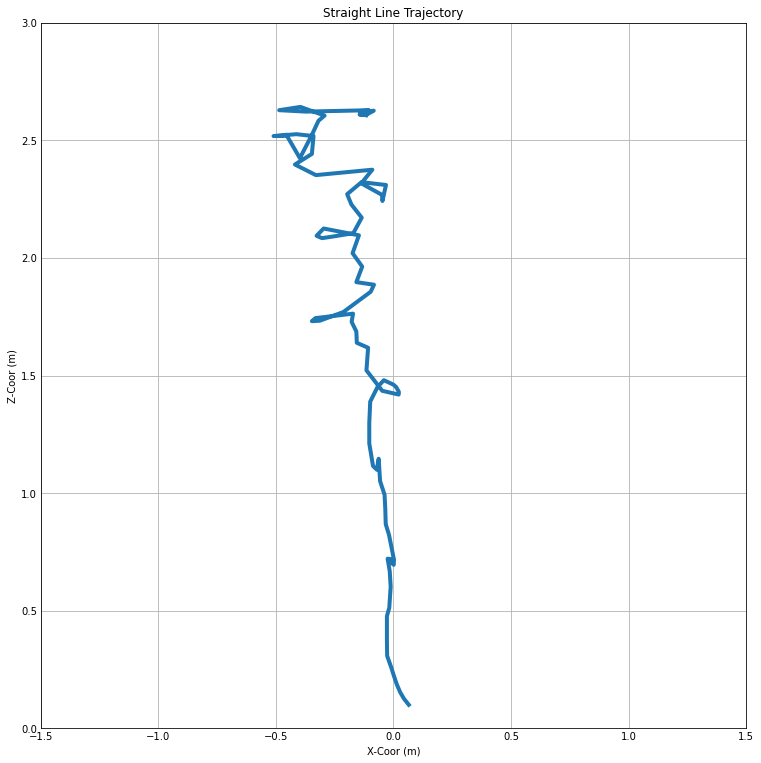

In [109]:
robot_pose_df = pd.read_csv('./robot_pose_1864847634.csv')

print('First 5 lines:')
print(robot_pose_df.head())

plt.figure(figsize=(10, 10))
plt.plot(robot_pose_df['x_coor'], robot_pose_df['z_coor'], linewidth=4)

# Add labels and title
plt.xlabel('X-Coor (m)')
plt.ylabel('Z-Coor (m)')
plt.title('Straight Line Trajectory')
plt.xlim(-1.5, 1.5)
plt.ylim(0,3)
# Show the plot
plt.show()
